<a href="https://colab.research.google.com/github/aryansingh-ui/hello-world/blob/main/mbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
!git clone 'https://github.com/yohanesnuwara/pyreservoir'

Cloning into 'pyreservoir'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 951 (delta 16), reused 0 (delta 0), pack-reused 915
Receiving objects: 100% (951/951), 24.45 MiB | 21.47 MiB/s, done.
Resolving deltas: 100% (505/505), done.


In [5]:
import sys
sys.path.append('/content/pyreservoir/matbal')
#importing system,when you hve cloned a repository when you put it in a directory,when you are using software you can locate a file in certain directory
#

In [6]:
#from mbal module and from that import the functions
from mbal import drygas,gascondensate,oil

In [9]:
#Linear Regression or curve fitting
#import curve_fit from scipy

from scipy.optimize import curve_fit


In [12]:
x = np.linspace(0,50,100)


def linear(x,a,b):
  y = a * x + b
  return y


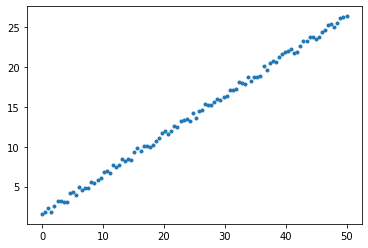

In [18]:
#create dummy data with a=0.5,b=1
#add with random noise,multiplied by 1.5
a=0.5
b=1
y = linear(x,a,b)

noise =np.random.random(100)
y=y+noise
plt.plot(x,y,'.')
plt.show()

In [19]:
popt,pcov = curve_fit(linear,x,y)

In [20]:
popt
#popt is the most appropriate value of a,b

array([0.50037462, 1.49829083])

In [23]:
a,b =popt
#its bcuz we have added noise

1.498290830212236

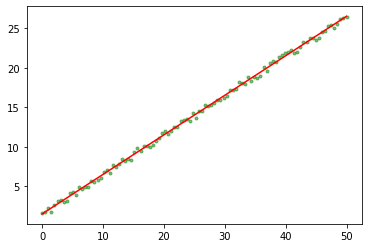

In [27]:
yreg = a*x+b
plt.plot(x,y,'.',color='green',alpha=0.5)
plt.plot(x,yreg,color='red')
plt.show()

In [29]:
#DRY GAS RESERVOIR,ONLY GAS IS PRODUCED,NO LIQUID,DUE TO GAS EXPANSION,NO LIQUID DRIVE
#RECOVERY FACTOR IS RELATIVELY HIGH
filepath='/content/pyreservoir/data/dry_gas_with_waterdrive.csv'
data =pd.read_csv(filepath)
data

,t,p,Gp,Np,total_Gp,Wp,Bg,Bw,z
0,0.0,8490.0,0.0,0.0,0.00,0,0.5404,1.0518,1.271392
1,0.5,8330.0,1758.0,2000.0,1759.42,0,0.5458,1.0520,1.259897
2,1.0,8323.0,5852.0,30000.0,5873.24,1000,0.5460,1.0520,1.259299
3,1.5,8166.0,10410.0,66000.0,10456.73,3000,0.5516,1.0522,1.248217
4,2.0,8100.0,14828.0,98000.0,14897.38,4000,0.5540,1.0522,1.243516
5,2.5,7905.0,21097.0,138000.0,21194.70,7000,0.5614,1.0524,1.229789
6,3.0,7854.0,26399.0,180000.0,26526.44,9000,0.5634,1.0525,1.226208
7,3.5,7858.0,30042.0,215000.0,30194.22,10000,0.5632,1.0525,1.226397
8,4.0,7900.0,32766.0,237000.0,32933.80,11000,0.5616,1.0524,1.229449
9,4.5,7971.0,34548.0,257000.0,34729.96,11000,0.5588,1.0524,1.234314


In [40]:
t = data['t'].values
p = data['p'].values
Gp = data['Gp'].values
Np = data['Np'].values

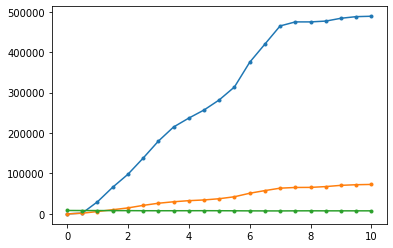

In [45]:
plt.plot(t,Np,'.-')
plt.plot(t,Gp,'.-')
plt.plot(t,p,'.-')
plt.show()

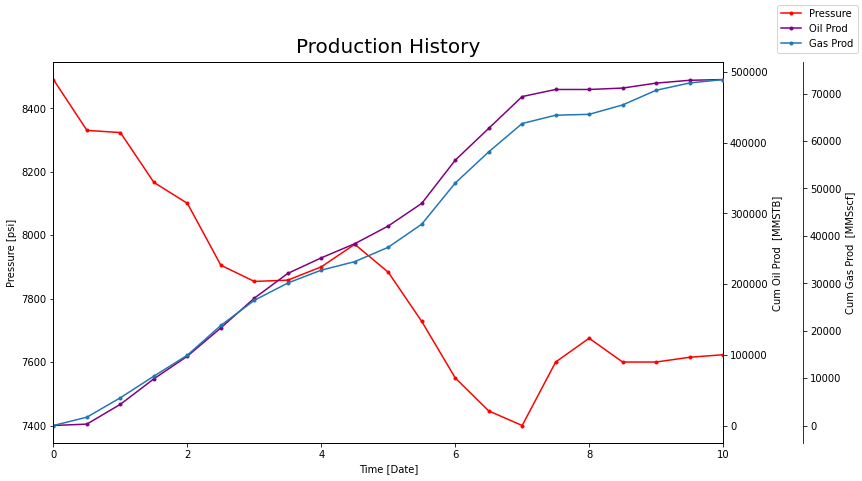

In [54]:
fig = plt.figure(figsize=(12,7))

host = fig.add_subplot(111)
par1 = host.twinx()
par2 = host.twinx()

host.plot(t,p,'.-',color='red',label='Pressure')
par1.plot(t,Np,'.-',color='purple',label='Oil Prod')
par2.plot(t,Gp,'.-',label='Gas Prod')
par2.spines['right'].set_position(('outward',80))

host.set_title('Production History',size=20,pad=10)
host.set_xlabel('Time [Date]')
host.set_ylabel('Pressure [psi]')
par1.set_ylabel('Cum Oil Prod  [MMSTB]')
par2.set_ylabel('Cum Gas Prod  [MMSscf]')
host.set_xlim(min(t),max(t))
fig.legend()
plt.show()